## 1. Load and Explore Data

In [4]:
# Load the generated dataset
df = pd.read_csv('data/maintenance_data.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (2000, 8)


,Machine_ID,Age,Usage_Hours,Maintenance_Type,Last_Maintenance_Days,Part_Replacement,Technician_Experience,Maintenance_Cost
0,M_0000,6.243562,8694.525025,Preventive,234,0,18.562733,1273.665703
1,M_0001,14.310000,19611.400319,Corrective,10,0,11.432581,4712.400172
2,M_0002,11.247915,26538.127172,Preventive,316,0,12.076971,3141.723299
3,M_0003,9.381219,12892.790023,Routine,270,0,8.631409,1359.276849
4,M_0004,3.184261,4483.199313,Routine,22,0,19.032512,470.784708


## 2. Exploratory Data Analysis (EDA)

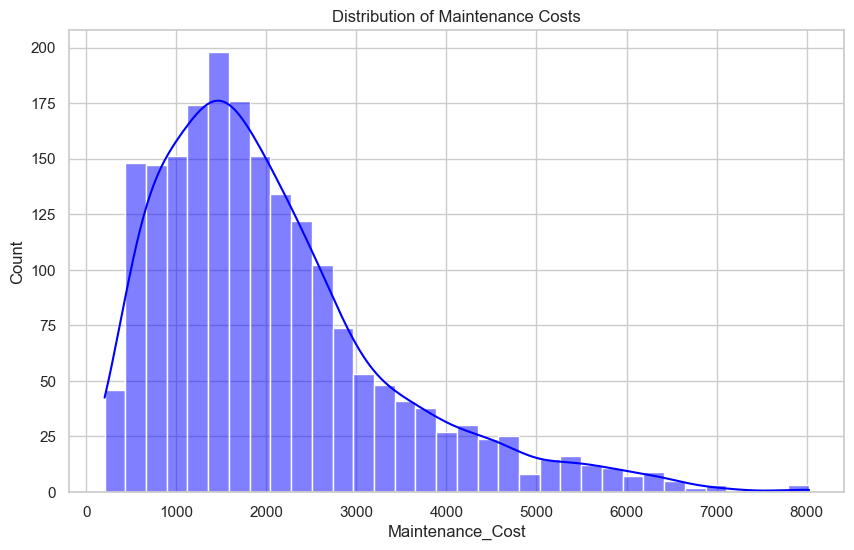

In [5]:
# Distribution of Maintenance Cost
plt.figure(figsize=(10, 6))
sns.histplot(df['Maintenance_Cost'], kde=True, color='blue')
plt.title('Distribution of Maintenance Costs')
plt.show()

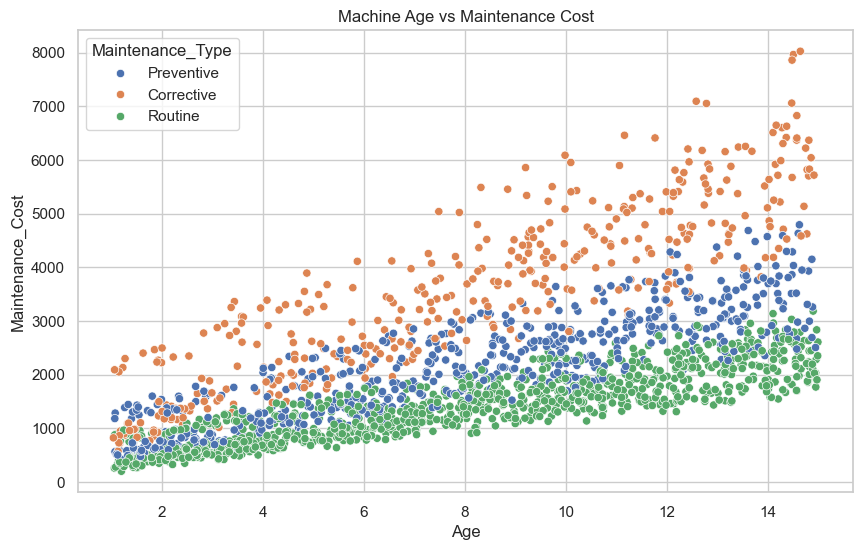

In [6]:
# Relationship between Age and Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Maintenance_Cost', hue='Maintenance_Type')
plt.title('Machine Age vs Maintenance Cost')
plt.show()

## 3. Model Training and Evaluation

In [7]:
# Define features and target
X = df.drop(['Machine_ID', 'Maintenance_Cost'], axis=1)
y = df['Maintenance_Cost']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = ['Age', 'Usage_Hours', 'Last_Maintenance_Days', 'Technician_Experience']
categorical_features = ['Maintenance_Type', 'Part_Replacement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create pipeline with Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

MAE: 79.09
MSE: 11771.85
R2 Score: 0.9932


## 4. Feature Importance

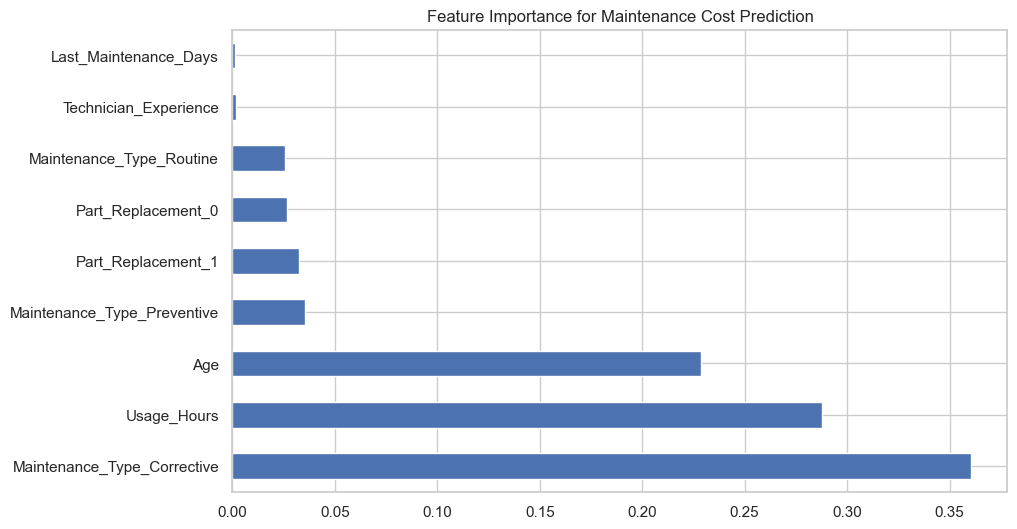

In [8]:
# Extract feature importance
importances = model.named_steps['regressor'].feature_importances_
feature_names = (numeric_features + 
                 list(model.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .get_feature_names_out(categorical_features)))

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh')
plt.title('Feature Importance for Maintenance Cost Prediction')
plt.show()